# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [4]:
iris_data =  pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data=iris_data.set_index('Id')

# EDA

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
iris_data.shape

(150, 5)

In [8]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris_data['target']= iris_data['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [10]:
iris_data.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
Id,,,,,,
141,6.7,3.1,5.6,2.4,Iris-virginica,2
142,6.9,3.1,5.1,2.3,Iris-virginica,2
143,5.8,2.7,5.1,1.9,Iris-virginica,2
144,6.8,3.2,5.9,2.3,Iris-virginica,2
145,6.7,3.3,5.7,2.5,Iris-virginica,2
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,2
149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [11]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,2


In [13]:
iris_data.drop_duplicates(inplace=True)

In [15]:
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# Label encoding

In [17]:
le = LabelEncoder()

iris_data['Species'] = le.fit_transform(iris_data['Species'])

iris_data['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

In [18]:
iris_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
Id,,,,,,
1,5.1,3.5,1.4,0.2,0,0
2,4.9,3.0,1.4,0.2,0,0
3,4.7,3.2,1.3,0.2,0,0
4,4.6,3.1,1.5,0.2,0,0
5,5.0,3.6,1.4,0.2,0,0
6,5.4,3.9,1.7,0.4,0,0
7,4.6,3.4,1.4,0.3,0,0
8,5.0,3.4,1.5,0.2,0,0
9,4.4,2.9,1.4,0.2,0,0


# Data visualization


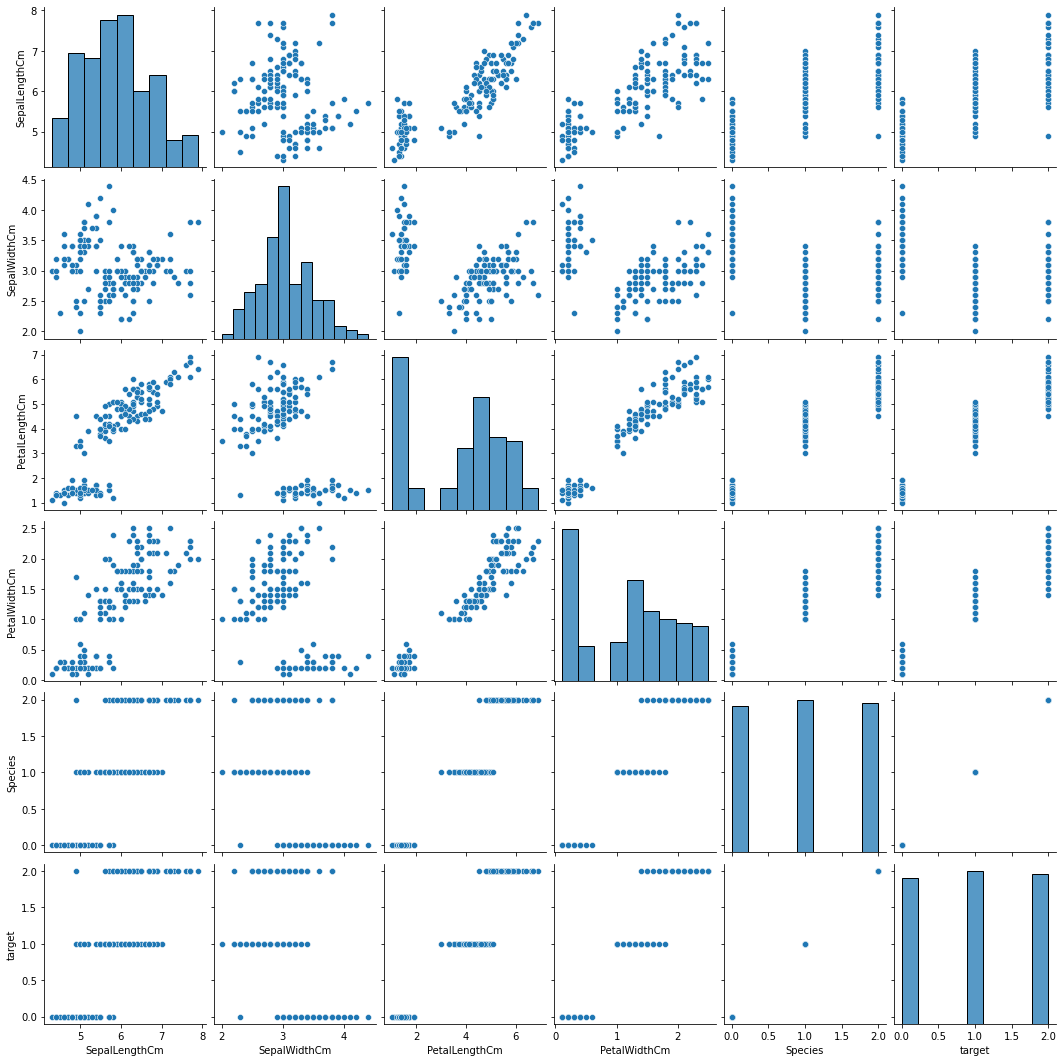

In [19]:
sns.pairplot(iris_data)

<AxesSubplot:ylabel='Density'>

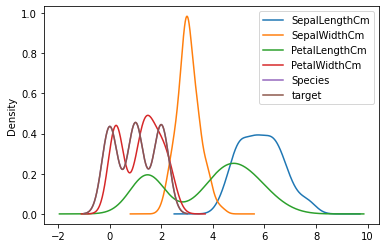

In [20]:
iris_data.plot.kde()

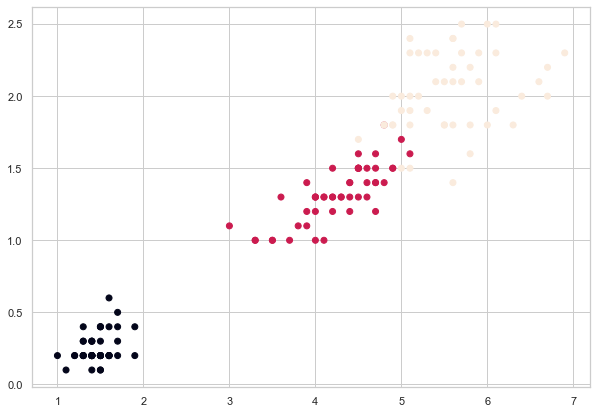

In [21]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
plt.scatter(iris_data['PetalLengthCm'],iris_data['PetalWidthCm'],c=iris_data.Species.values)

> fig1: We will use above graph to compare the accuracy of our model

# Finding the optimum number of clusters

In [22]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000,1.000000
target,0.782904,-0.418348,0.948339,0.955693,1.000000,1.000000


In [23]:
X = iris_data.iloc[:, [0, 1, 2, 3]].values

In [24]:

def elbowMethod(clusters,inertia):
    sns.set(style='whitegrid')
    plt.figure(figsize=(10,8))
    sns.lineplot(clusters,inertia,marker='o',color='red')
    plt.title('Elbow Method')
    plt.xlabel('No. of clusters')
    plt.ylabel('Intertia')
    plt.show()
    

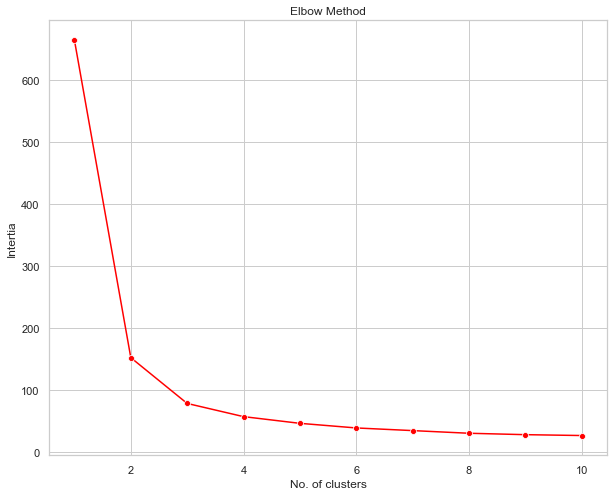

In [25]:
inertia= []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300,n_init=10,random_state=45)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
elbowMethod(range(1,11),inertia)    

> The elbow of the curve is at 3
 >### So optimum number of clusters are 3

In [26]:
kmeans_model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [27]:
kmeans_model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [28]:
ypred= kmeans_model.fit_predict(X)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [29]:
kmeans_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951]])

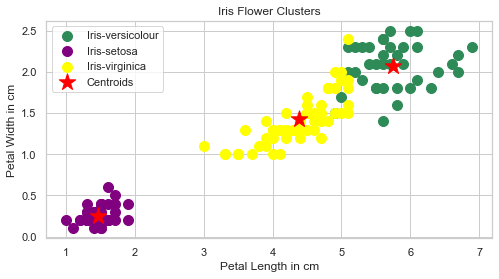

In [30]:
fig = plt.figure(figsize=(8,4))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(X[ypred == 0, 2], X[ypred == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(X[ypred == 1, 2], X[ypred == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[ypred == 2, 2],X[ypred == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans_model.cluster_centers_[:, 2], kmeans_model.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()



### If we compare fig1 and the above figure, its almost similar

Thus model has good accuracy